In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False


### pandas_datareader
- 큰 단체와 연계하여 데이터를 손쉽게 가져올 수 있도록 만든 라이브러리
- https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

###  삼성전자 주식 데이터를 읽어온다.

In [2]:
f = data.DataReader('005930.KS', 'yahoo', '2010-01-01', '2022-02-11')
f

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12955.746094
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13163.931641
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13468.208008
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13019.803711
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13147.919922
...,...,...,...,...,...,...
2022-02-07,73600.0,72400.0,73500.0,73000.0,14240838.0,73000.000000
2022-02-08,73000.0,73000.0,73000.0,73000.0,0.0,73000.000000
2022-02-09,73000.0,73000.0,73000.0,73000.0,0.0,73000.000000


### 데이터 확인

In [3]:
f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2987 entries, 2010-01-04 to 2022-02-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2987 non-null   float64
 1   Low        2987 non-null   float64
 2   Open       2987 non-null   float64
 3   Close      2987 non-null   float64
 4   Volume     2987 non-null   float64
 5   Adj Close  2987 non-null   float64
dtypes: float64(6)
memory usage: 163.4 KB


In [4]:
# 결측치 확인
f.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
# 인덱스 데이터의 타입확인(보기에 날짜로 되어 있어서...)
f.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-02-03',
               '2022-02-04', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11'],
              dtype='datetime64[ns]', name='Date', length=2987, freq=None)

### 일별 수익률 계산

In [6]:
# 전날 보다 얼마가 오르고 내렸는가....
f['Close'].diff()

Date
2010-01-04       NaN
2010-01-05     260.0
2010-01-06     380.0
2010-01-07    -560.0
2010-01-08     160.0
               ...  
2022-02-07   -1000.0
2022-02-08       0.0
2022-02-09       0.0
2022-02-10    2400.0
2022-02-11    -500.0
Name: Close, Length: 2987, dtype: float64

In [7]:
# 전날보다 얼마나 등락했는지 비율(1 ~ -1)
f['Close'].pct_change() * 100

Date
2010-01-04         NaN
2010-01-05    1.606922
2010-01-06    2.311436
2010-01-07   -3.329370
2010-01-08    0.984010
                ...   
2022-02-07   -1.351351
2022-02-08    0.000000
2022-02-09    0.000000
2022-02-10    3.287671
2022-02-11   -0.663130
Name: Close, Length: 2987, dtype: float64

In [8]:
# diff 에 대한 시각화
a1 = f['Close'].diff()
a1.fillna(0, inplace=True)
a1

Date
2010-01-04       0.0
2010-01-05     260.0
2010-01-06     380.0
2010-01-07    -560.0
2010-01-08     160.0
               ...  
2022-02-07   -1000.0
2022-02-08       0.0
2022-02-09       0.0
2022-02-10    2400.0
2022-02-11    -500.0
Name: Close, Length: 2987, dtype: float64

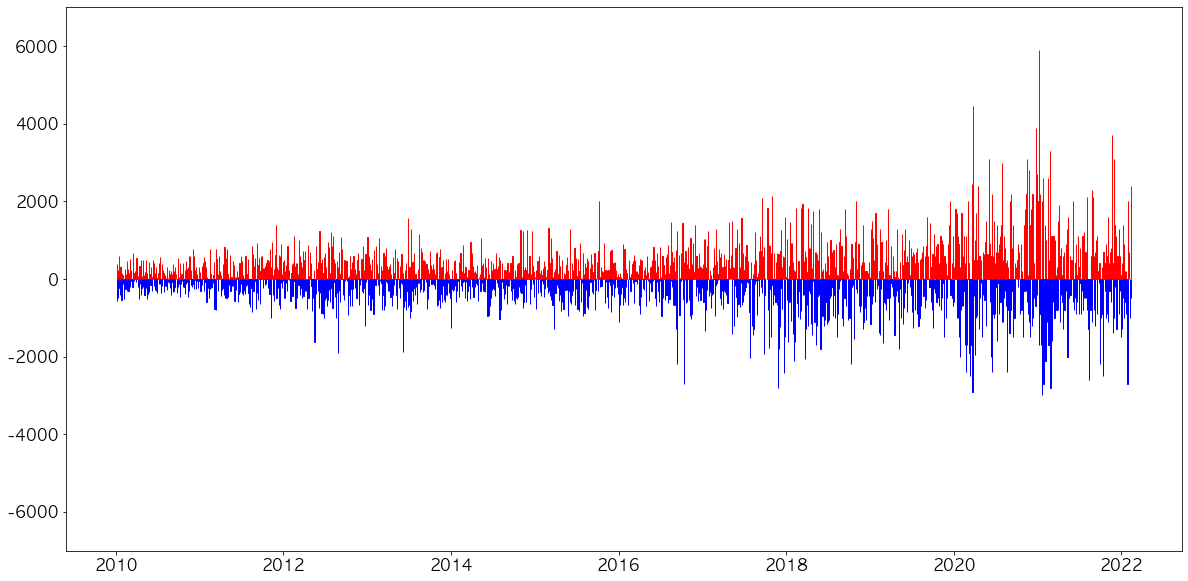

In [9]:
bar_list = plt.bar(a1.index, a1.values)

# 값이 0보다 크면 빨간색, 작으면 파란색으로 설정한다.
for idx, value in enumerate(a1.values) :
    if value > 0 :
        bar_list[idx].set_color('r')
    elif value < 0 :
        bar_list[idx].set_color('b')
        
plt.ylim(-7000, 7000)

plt.show()

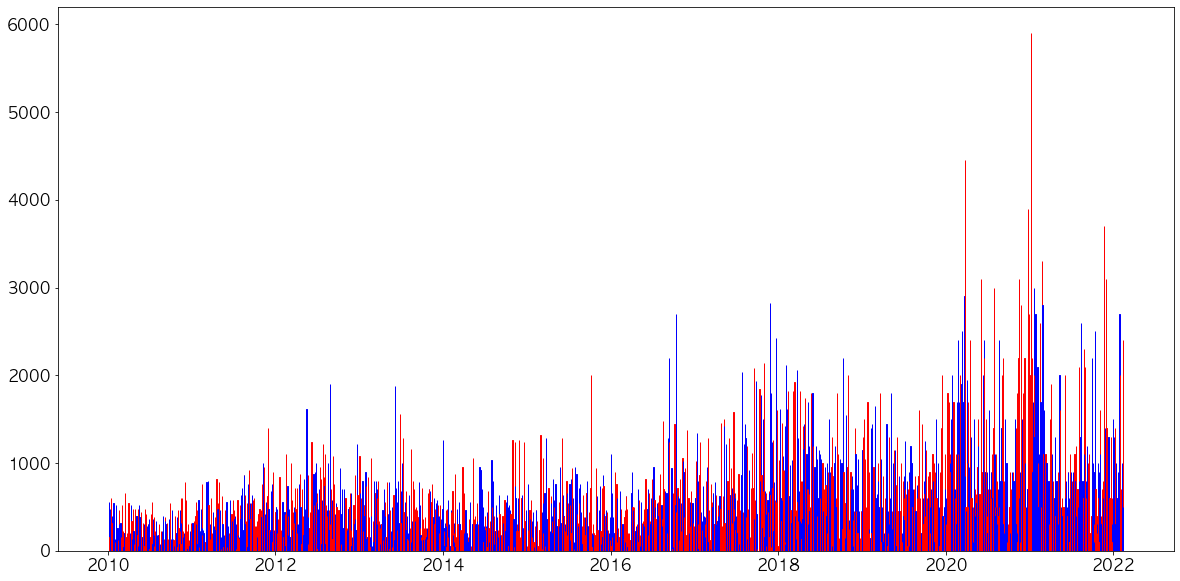

In [10]:
bar_list = plt.bar(a1.index, abs(a1.values))

# 값이 0보다 크면 빨간색, 작으면 파란색으로 설정한다.
for idx, value in enumerate(a1.values) :
    if value > 0 :
        bar_list[idx].set_color('r')
    elif value < 0 :
        bar_list[idx].set_color('b')
        

plt.show()

### 종가 시각화

In [11]:
# 종가
cel_close = f['Close']
cel_close

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2022-02-07    73000.0
2022-02-08    73000.0
2022-02-09    73000.0
2022-02-10    75400.0
2022-02-11    74900.0
Name: Close, Length: 2987, dtype: float64

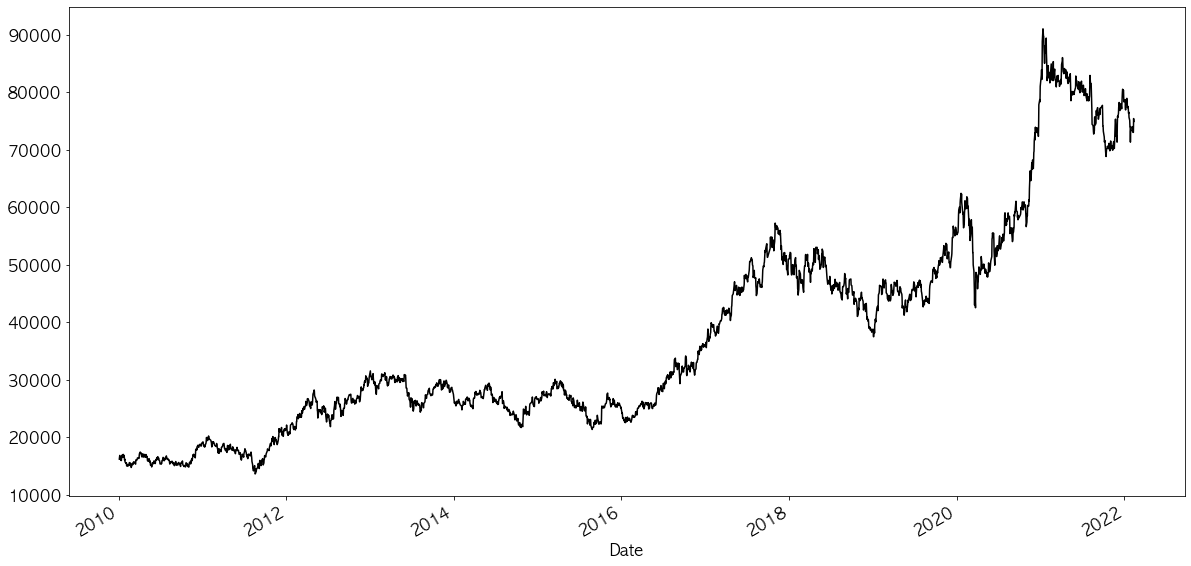

In [12]:
# 시각화
# index를 x축, 값을 y축
cel_close.plot(color='black')
plt.show()

### 특정 범위를 벗어나는 그래프의 색을 다르게 표시한다.
- 10% 90%

In [13]:
# 10%, 90% 위치의 값을 가져온다.
value_10 = cel_close.quantile(q=0.1)
value_90 = cel_close.quantile(q=0.9)

print(value_10)
print(value_90)

17164.0
67020.00000000007


In [14]:
# 10% 이하의 값과 90% 이상의 값을 가져온다
a1 = f.query('Close <= @value_10 or Close >= @value_90')
a1['Close']

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2022-02-07    73000.0
2022-02-08    73000.0
2022-02-09    73000.0
2022-02-10    75400.0
2022-02-11    74900.0
Name: Close, Length: 598, dtype: float64

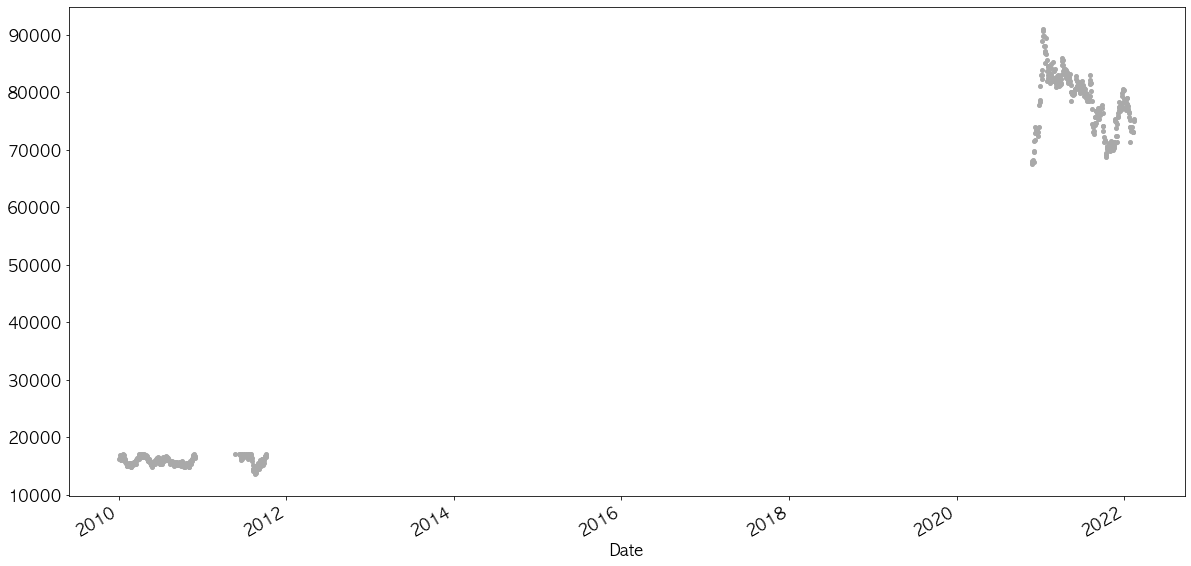

In [15]:
# 선 모양 : ' ' 를 줘서 선이 안나오게 한다.
a1['Close'].plot(style=' ', marker='o', ms=4, color='darkgray')
plt.show()

### 10%, 90% 되는 위치에 선을 그린다.

In [16]:
# 인덱스의 시작과 끝값을 가져온다.
index_min = cel_close.index[0]
index_max = cel_close.index[-1]

print(index_min)
print(index_max)

2010-01-04 00:00:00
2022-02-11 00:00:00


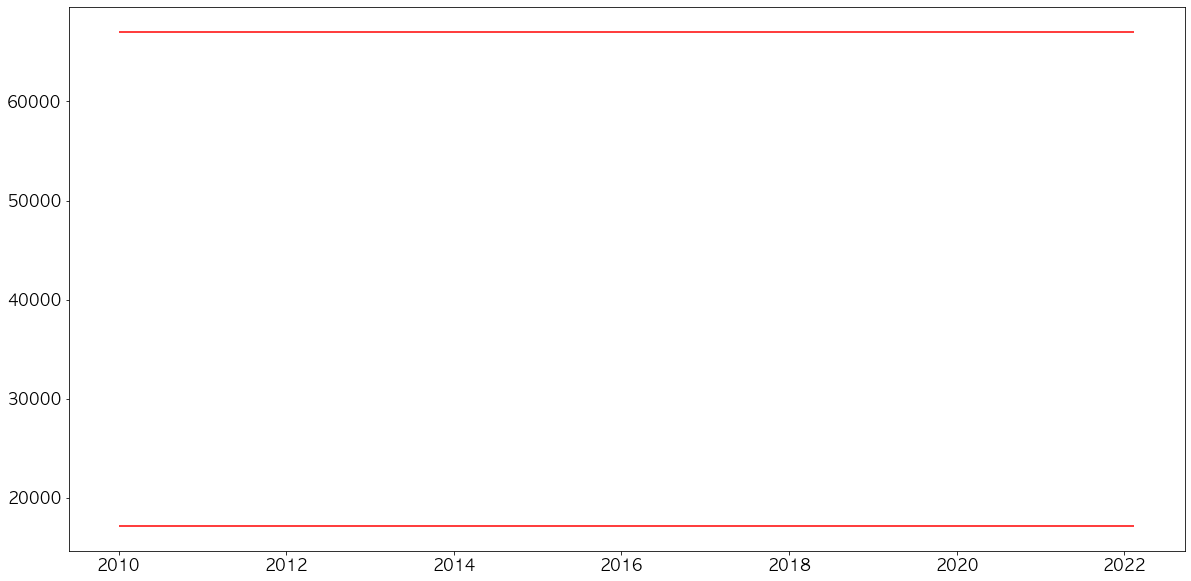

In [17]:
# 가로선을 그린다.
plt.hlines(xmin = index_min, xmax = index_max, y=[value_10, value_90], 
           color='red')
plt.show()

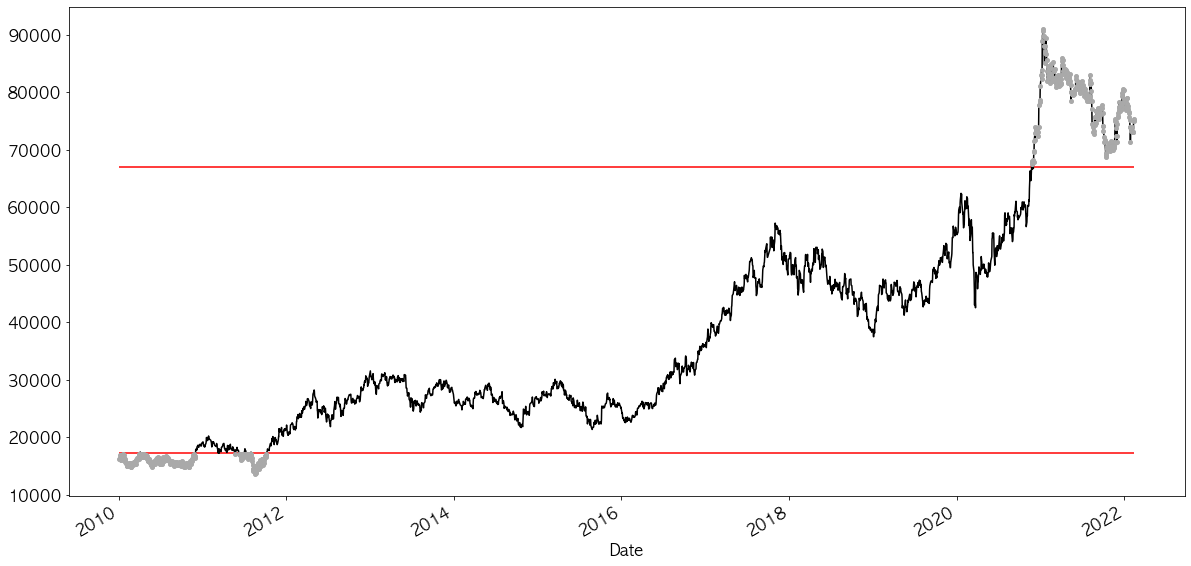

In [18]:
# 합친다
cel_close.plot(color='black')

a1['Close'].plot(style=' ', marker='o', ms=4, color='darkgray')

plt.hlines(xmin = index_min, xmax = index_max, y=[value_10, value_90], 
           color='red')

plt.show()

### 통계량 살펴보기

In [19]:
# 각 날짜의 수익률을 가져온다.
cel_pct_change = f['Close'].pct_change()
cel_pct_change

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2022-02-07   -0.013514
2022-02-08    0.000000
2022-02-09    0.000000
2022-02-10    0.032877
2022-02-11   -0.006631
Name: Close, Length: 2987, dtype: float64

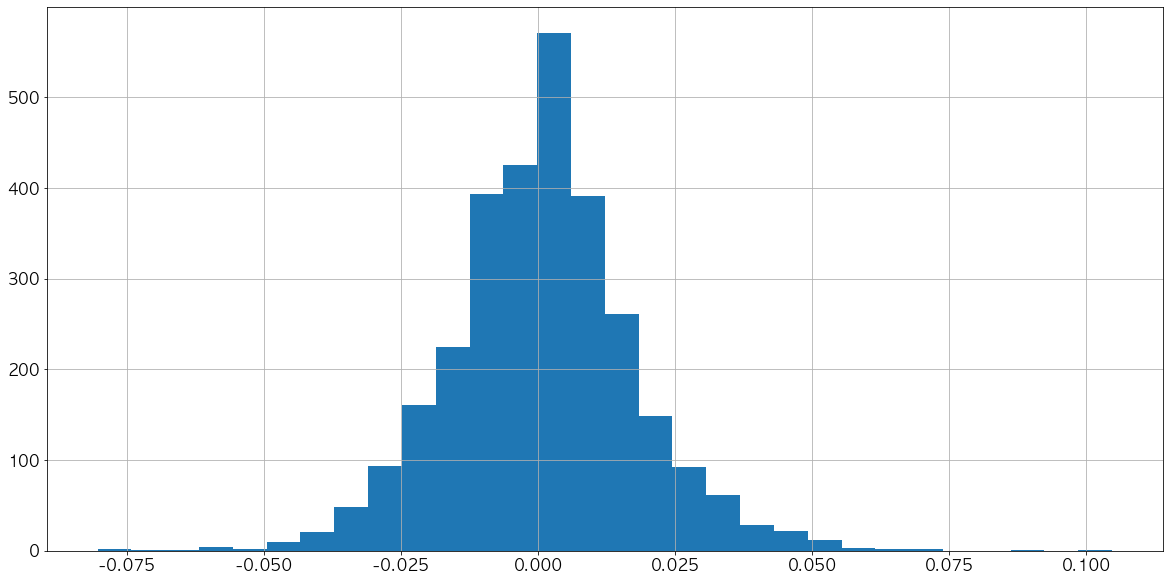

In [20]:
cel_pct_change.hist(bins=30)
plt.show()

### 첨도(Kurtosis)
- 첨도는 히스토그램에서 분포의 꼬리부분의 길이와 중앙 부분의 뾰족함에 대한 정보를 제공하는 통계량이다.
- 첨보다 0보다 크면 긴 꼬리를 갖고 중앙 부분에 덜 분포되어 있는 것으로 해석된다.

In [21]:
cel_pct_change.kurt()

1.6797588896277689

### 왜도
- 분포의 비대칭 정도를 나타내는 값
- 분포가 완전 대칭인 경우에는 왜도가 0이다.
- 왼쪽으로 긴 꼬리를 가지면 음수이고, 오른쪽으로 긴 꼬리를 가지면 양수
- 비대칭 정도가 심할 수록 왜도의 절대값이 증가한다.

In [22]:
cel_pct_change.skew()

0.1913161826760291